# Simple Image Processing

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bacalhau-project/examples/blob/main/data-engineering/image-processing/index.ipynb)
[![Open In Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/bacalhau-project/examples/HEAD?labpath=data-engineering%2Fimage-processing%2Findex.ipynb)
[![stars - badge-generator](https://img.shields.io/github/stars/bacalhau-project/bacalhau?style=social)](https://github.com/bacalhau-project/bacalhau)

In this example tutorial, we will show you how to use Bacalhau to process images on a [Landsat dataset](https://ipfs.io/ipfs/QmeZRGhe4PmjctYVSVHuEiA9oSXnqmYa4kQubSHgWbjv72/). 

Bacalhau has the unique capability of operating at a massive scale in a distributed environment. This is made possible because data is naturally sharded across the IPFS network amongst many providers. We can take advantage of this to process images in parallel.

## Prerequisite

To get started, you need to install the Bacalhau client, see more information [here](https://docs.bacalhau.org/getting-started/installation)

## Running a Bacalhau Job

To submit a workload to Bacalhau, we will use the `bacalhau docker run` command. 

In [17]:
%%bash --out job_id
bacalhau docker run \
  --wait \
  --wait-timeout-secs 100 \
  --id-only \
  -v QmeZRGhe4PmjctYVSVHuEiA9oSXnqmYa4kQubSHgWbjv72:/input_images \
  dpokidov/imagemagick:7.1.0-47-ubuntu \
  -- magick mogrify -resize 100x100 -quality 100 -path /outputs '/input_images/*.jpg'

The job has been submitted and Bacalhau has printed out the related job id. We store that in an environment variable so that we can reuse it later on.

In [ ]:
%env JOB_ID={job_id}

The `bacalhau docker run` command allows to pass input data volume with a `-v CID:path` argument just like Docker, except the left-hand side of the argument is a [content identifier (CID)](https://github.com/multiformats/cid). This results in Bacalhau mounting a *data volume* inside the container. By default, Bacalhau mounts the input volume at the path `/inputs` inside the container.

Bacalhau also mounts a data volume to store output data. The `bacalhau docker run` command creates an output data volume mounted at `/outputs`. This is a convenient location to store the results of your job. 

## Checking the State of your Jobs

- **Job status**: You can check the status of the job using `bacalhau list`. 

In [ ]:
%%bash
bacalhau list --id-filter=${JOB_ID} --no-style

When it says `Published` or `Completed`, that means the job is done, and we can get the results.

- **Job information**: You can find out more information about your job by using `bacalhau describe`.

In [ ]:
%%bash
bacalhau describe ${JOB_ID}

- **Job download**: You can download your job results directly by using `bacalhau get`. Alternatively, you can choose to create a directory to store your results. In the command below, we created a directory and downloaded our job output to be stored in that directory.

In [ ]:
%%bash
rm -rf results && mkdir results # Temporary directory to store the results
bacalhau get ${JOB_ID} --output-dir results # Download the results

After the download has finished you should see the following contents in results directory.

## Viewing your Job Output

Each job creates 3 subfolders: the **combined_results**, **per_shard files**, and the **raw** directory. To view the file, run the following command:

In [22]:
%%bash
ls -lah results/combined_results/outputs

total 196K
drwxr-xr-x 2 gitpod gitpod 4.0K Dec 14 13:22 .
drwxr-xr-x 3 gitpod gitpod   49 Dec 14 13:22 ..
-rw-r--r-- 3 gitpod gitpod  15K Dec 14 13:22 cafires_vir_2021231_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  34K Dec 14 13:22 greatsaltlake_oli_2017210_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  13K Dec 14 13:22 greecefires_oli_2021222_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  17K Dec 14 13:22 haitiearthquake_oli_20212_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  42K Dec 14 13:22 iwojima_tmo_2021225_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  11K Dec 14 13:22 lakemead_etm_2000220_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  14K Dec 14 13:22 lapalma_oli_2021141_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  14K Dec 14 13:22 spainfire_oli_2021227_lrg.jpg
-rw-r--r-- 3 gitpod gitpod  16K Dec 14 13:22 sulphursprings_oli_2019254_lrg.jpg


### Display the image

To view the images, we will use **glob** to return all file paths that match a specific pattern. 

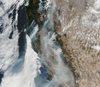

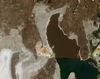

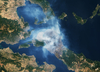

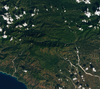

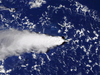

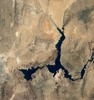

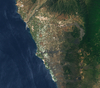

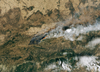

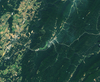

In [23]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('results/combined_results/outputs/*.jpg'):
    display(Image(filename=imageName))

## Need Support?

For questions, feedback, please reach out in our [forum](https://github.com/filecoin-project/bacalhau/discussions)